In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('NFL_kicking.csv')

In [3]:
# Remove useless columns
df.drop(['play_id', 'game_id', 'old_game_id', 'timeout', 'timeout_team'], axis=1, inplace=True)

# EDA

## Overall kicking results

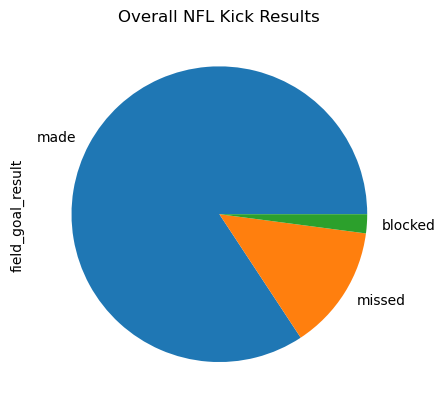

In [4]:
df['field_goal_result'].value_counts().plot(kind='pie');
plt.title('Overall NFL Kick Results');

## Results by 'iced'

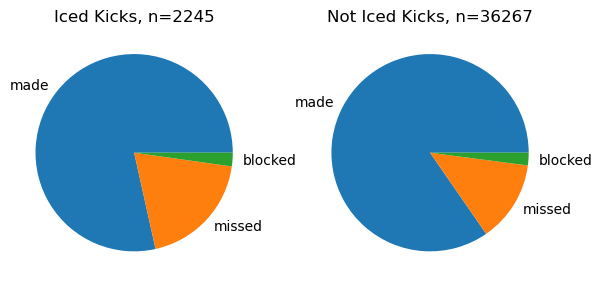

In [11]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(7,7))

# Iced kicks
s = df.query('iced == 1')['field_goal_result'].value_counts()
ax1.pie(s, labels=s.index)
ax1.title.set_text(f'Iced Kicks, n={s.sum()}');

# Not iced kicks
s = df.query('iced == 0')['field_goal_result'].value_counts()
ax2.pie(s, labels=s.index)
ax2.title.set_text(f'Not Iced Kicks, n={s.sum()}');

From pie charts above, the % of missed kicks is higher when the kicker was "iced" and % of blocked kicks are similar. However, the sample sizes between "iced" and "not iced" kicks were more than a magnitude different.

## Results by Home Field

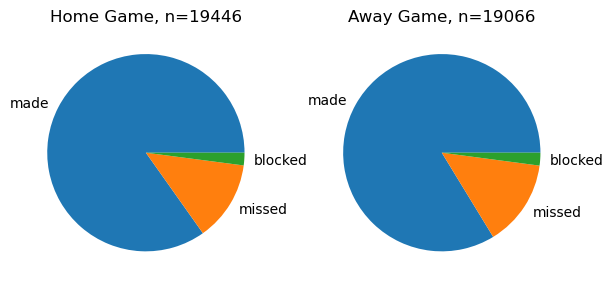

In [12]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(7,7))

# Home game
s = df.query('posteam_type == "home"')['field_goal_result'].value_counts()
ax1.pie(s, labels=s.index)
ax1.title.set_text(f'Home Game, n={s.sum()}');

# Away game
s = df.query('posteam_type == "away"')['field_goal_result'].value_counts()
ax2.pie(s, labels=s.index)
ax2.title.set_text(f'Away Game, n={s.sum()}');

Similar field goal made % for home vs. away games.

## Result by Field Surface

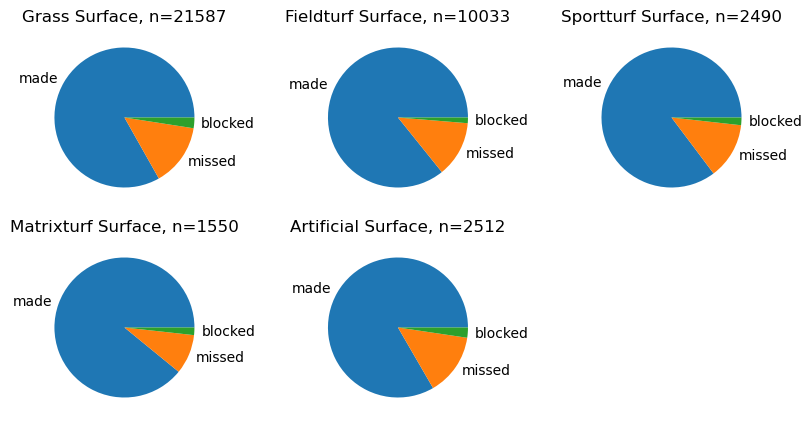

In [8]:
fig, ax = plt.subplots(2,3,figsize=(10,5))

# Grass
surface = 'grass'
s = df.query('surface == @surface')['field_goal_result'].value_counts()
ax[0,0].pie(s, labels=s.index)
ax[0,0].title.set_text(f'{surface.capitalize()} Surface, n={s.sum()}');

# Fieldturf
surface = 'fieldturf'
s = df.query('surface == @surface')['field_goal_result'].value_counts()
ax[0,1].pie(s, labels=s.index)
ax[0,1].title.set_text(f'{surface.capitalize()} Surface, n={s.sum()}');

# Sportturf
surface = 'sportturf'
s = df.query('surface == @surface')['field_goal_result'].value_counts()
ax[0,2].pie(s, labels=s.index)
ax[0,2].title.set_text(f'{surface.capitalize()} Surface, n={s.sum()}');

# Matrixturf
surface = 'matrixturf'
s = df.query('surface == @surface')['field_goal_result'].value_counts()
ax[1,0].pie(s, labels=s.index)
ax[1,0].title.set_text(f'{surface.capitalize()} Surface, n={s.sum()}');

# Artificial Turf
surface = ['astroturf', 'a_turf', 'astroplay']
s = df.query('surface in @surface')['field_goal_result'].value_counts()
ax[1,1].pie(s, labels=s.index)
ax[1,1].title.set_text(f'Artificial Surface, n={s.sum()}');


ax[1,2].axis('off');

Lower miss rate at matrixturf comparing to other surfaces but the sample size is small. Block rate appears similar across all surfaces. 

## By Year
#### Do kickers kick better over time??

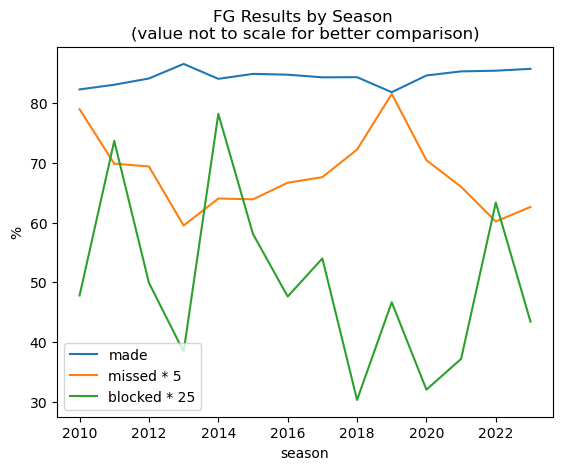

In [47]:
by_year_results = df.groupby(['season', 'field_goal_result'], as_index=False).size()
by_year_count = df.groupby(['season'], as_index=False).size()
by_year = by_year_results.merge(by_year_count, on='season')
by_year.rename(columns={'size_x':'count', 'size_y':'total', 'field_goal_result':'result'}, inplace=True)
by_year['%'] = by_year.apply(lambda x: x['count']/x['total'], axis=1)
plt.plot(by_year.query('result == "made"').season, by_year.query('result == "made"')['%']*100);
plt.plot(by_year.query('result == "missed"').season, by_year.query('result == "missed"')['%']*500);
plt.plot(by_year.query('result == "blocked"').season, by_year.query('result == "blocked"')['%']*2500);
plt.legend(['made', 'missed * 5', 'blocked * 25']);
plt.xlabel('season');
plt.ylabel('%')
plt.title('FG Results by Season \n(value not to scale for better comparison)');

No significant improvement from kickers. The FG miss rate peaked around 2019 and has improved since, and FG made rate also improved since. <br>
How about long kicks (> 50 yd)? Do kickers make them more easily?

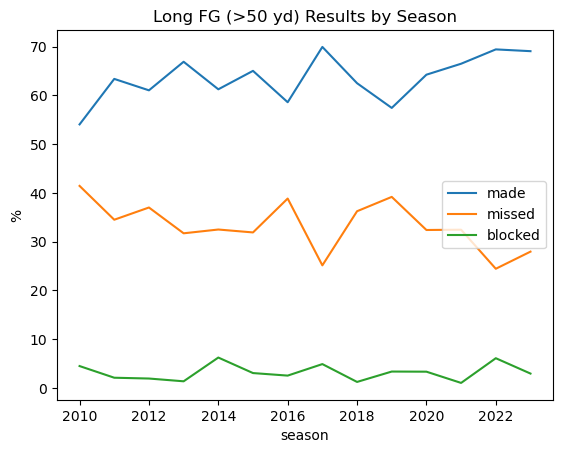

In [60]:
threshold = 50
by_year_results = df.query('kick_distance >= @threshold').groupby(['season', 'field_goal_result'], as_index=False).size()
by_year_count = df.query('kick_distance >= @threshold').groupby(['season'], as_index=False).size()
by_year = by_year_results.merge(by_year_count, on='season')
by_year.rename(columns={'size_x':'count', 'size_y':'total', 'field_goal_result':'result'}, inplace=True)
by_year['%'] = by_year.apply(lambda x: x['count']/x['total'], axis=1)
plt.plot(by_year.query('result == "made"').season, by_year.query('result == "made"')['%']*100);
plt.plot(by_year.query('result == "missed"').season, by_year.query('result == "missed"')['%']*100);
plt.plot(by_year.query('result == "blocked"').season, by_year.query('result == "blocked"')['%']*100);
plt.legend(['made', 'missed', 'blocked']);
plt.xlabel('season');
plt.ylabel('%')
plt.title('Long FG (>50 yd) Results by Season');

Yes, kickers seem to become more capable of making long FG. The miss rate appear to be slowly declining, and block rate is similar. Interestingly, 2017 season had the highest long FG made %. 

## Indoor vs. Outdoor

In [62]:
indoor = df.query('roof in ["closed", "dome"]')
outdoor = df.query('roof == "outdoors"')

In [64]:
indoor.groupby('field_goal_result').size()

field_goal_result
blocked     196
made       8787
missed     1335
dtype: int64

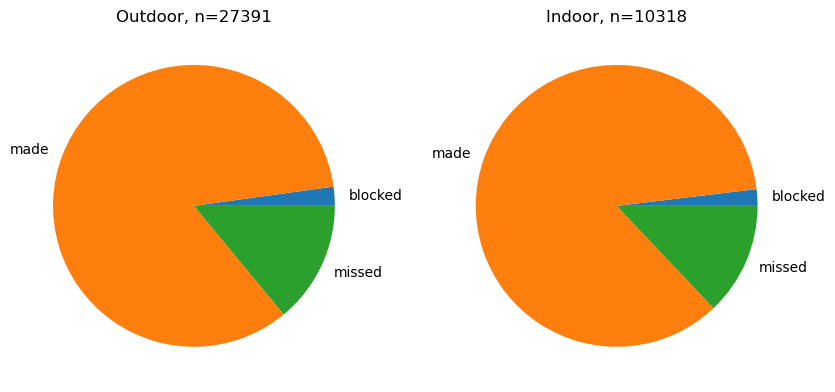

In [79]:
fig, ax = plt.subplots(1,2,figsize=(10,5))

# Outdoor
s = outdoor.groupby('field_goal_result').size()
ax[0].pie(s, labels=s.index)
ax[0].title.set_text(f'Outdoor, n={s.sum()}');

# Indoor
s = indoor.groupby('field_goal_result').size()
ax[1].pie(s, labels=s.index)
ax[1].title.set_text(f'Indoor, n={s.sum()}');


## By Team

In [107]:
by_team_result = df.groupby(['posteam', 'season', 'field_goal_result'], as_index=False).size()
by_team_count = df.groupby(['posteam', 'season'], as_index=False).size()
by_team = by_team_result.merge(by_team_count, on=['posteam', 'season'])
by_team.rename(columns={'size_x':'count', 'size_y':'total', 'field_goal_result':'result'}, inplace=True)
by_team['%'] = by_team.apply(lambda x: x['count']/x['total'], axis=1)

In [113]:
# Best field goal kicking teams
by_team.query('result == "made"').sort_values('%', ascending=False).head(10)

,posteam,season,result,count,total,%
949,SEA,2020,made,52,52,1.000000
399,GB,2020,made,40,40,1.000000
82,BAL,2016,made,76,78,0.974359
978,SF,2018,made,66,68,0.970588
500,JAX,2019,made,66,68,0.970588
807,NYG,2018,made,64,66,0.969697
811,NYG,2020,made,62,64,0.968750
89,BAL,2019,made,60,62,0.967742
1059,TEN,2023,made,58,60,0.966667
55,ATL,2018,made,50,52,0.961538


In [114]:
# Worst field goal kicking teams
by_team.query('result == "made"').sort_values('%', ascending=True).head(10)

,posteam,season,result,count,total,%
1050,TEN,2019,made,18,38,0.473684
752,NE,2023,made,32,50,0.640000
379,GB,2012,made,92,140,0.657143
600,LAC,2017,made,40,60,0.666667
353,DET,2014,made,81,120,0.675000
560,LA,2015,made,63,93,0.677419
845,NYJ,2019,made,38,56,0.678571
715,MIN,2020,made,30,44,0.681818
1062,WAS,2010,made,96,140,0.685714
711,MIN,2018,made,44,64,0.687500


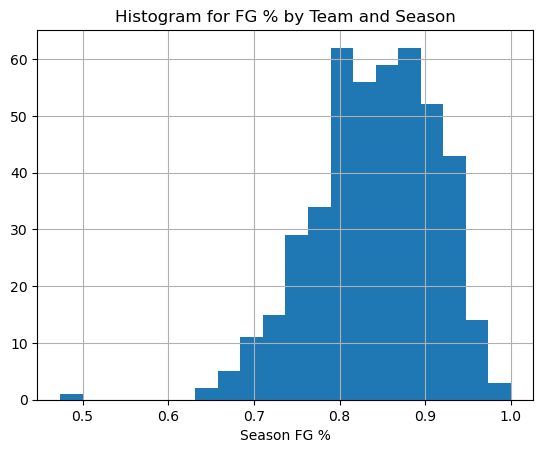

In [123]:
by_team.query('result == "made"')['%'].hist(bins=20);
plt.title('Histogram for FG % by Team and Season');
plt.xlabel('Season FG %');